# Name : M.Aizaz Ud Din

### LGM VIRTUAL INTERNSHIP PROGRAM 2021

### January 2022

### Domain : DATA SCIENCE

### Task 1:Stock Market Prediction And Forecasting Using Stacked LSTM

##### Importing all libraries required in this notebook

In [2]:
import tabula as tb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sa

### Read File

In [3]:
path="https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv"

In [4]:
data=pd.read_csv(path,sep=",")

In [5]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [6]:
data.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


### Reverse the order of file

In [7]:
df= data.iloc[::-1]

In [8]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [9]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35


### Let us plot the Close value graph using pyplot

In [10]:
data_close=df["Close"]

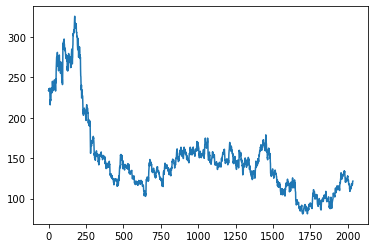

In [11]:
plt.plot(data_close)

### set value of close in range of 0,1

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data_close=scaler.fit_transform(np.array(data_close).reshape(-1,1))

### Test and train data

In [13]:
train_data=int(0.65*len(data_close))

In [14]:
test_data=len(data_close)-train_data

In [15]:
train,test=data_close[0:train_data,:],data_close[train_data:len(data_close),:1]

In [16]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [17]:
time_step = 100
X_train, y_train = create_dataset(train, time_step)
X_test, ytest = create_dataset(test, time_step)

In [42]:
print(X_train.shape) ,print(y_train.shape)

(1221, 100, 1)
(1221,)


(None, None)

In [44]:
print(X_test.shape) ,print(ytest.shape)

(612, 100, 1)
(612,)


(None, None)

In [18]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

### Then import required modules for the stacked LSTM.

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM

In [20]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(Dropout(0.25))

In [21]:
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dropout(0.25))

In [22]:
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam', metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-traina

In [32]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
20/20 [==============================] - 6s 302ms/step - loss: 8.0970e-04 - accuracy: 8.1900e-04 - val_loss: 0.0052 - val_accuracy: 0.0016
Epoch 2/100
20/20 [==============================] - 5s 269ms/step - loss: 8.0592e-04 - accuracy: 8.1900e-04 - val_loss: 0.0061 - val_accuracy: 0.0016
Epoch 3/100
20/20 [==============================] - 6s 320ms/step - loss: 8.0168e-04 - accuracy: 8.1900e-04 - val_loss: 0.0045 - val_accuracy: 0.0016
Epoch 4/100
20/20 [==============================] - 7s 350ms/step - loss: 7.5821e-04 - accuracy: 8.1900e-04 - val_loss: 0.0048 - val_accuracy: 0.0016
Epoch 5/100
20/20 [==============================] - 7s 340ms/step - loss: 8.7956e-04 - accuracy: 8.1900e-04 - val_loss: 0.0023 - val_accuracy: 0.0016
Epoch 6/100
20/20 [==============================] - 7s 371ms/step - loss: 8.2833e-04 - accuracy: 8.1900e-04 - val_loss: 0.0031 - val_accuracy: 0.0016
Epoch 7/100
20/20 [==============================] - 7s 337ms/step - loss: 7.6175e-04 - accura

Epoch 55/100
20/20 [==============================] - 8s 394ms/step - loss: 4.2502e-04 - accuracy: 8.1900e-04 - val_loss: 0.0016 - val_accuracy: 0.0016
Epoch 56/100
20/20 [==============================] - 6s 303ms/step - loss: 3.8319e-04 - accuracy: 8.1900e-04 - val_loss: 0.0015 - val_accuracy: 0.0016
Epoch 57/100
20/20 [==============================] - 6s 304ms/step - loss: 3.7561e-04 - accuracy: 8.1900e-04 - val_loss: 0.0026 - val_accuracy: 0.0016
Epoch 58/100
20/20 [==============================] - 7s 346ms/step - loss: 3.5671e-04 - accuracy: 8.1900e-04 - val_loss: 0.0035 - val_accuracy: 0.0016
Epoch 59/100
20/20 [==============================] - 6s 302ms/step - loss: 3.9355e-04 - accuracy: 8.1900e-04 - val_loss: 0.0028 - val_accuracy: 0.0016
Epoch 60/100
20/20 [==============================] - 7s 360ms/step - loss: 3.6259e-04 - accuracy: 8.1900e-04 - val_loss: 0.0017 - val_accuracy: 0.0016
Epoch 61/100
20/20 [==============================] - 7s 340ms/step - loss: 3.6278e-04 -

### Prediction

In [45]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [46]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

136.15980048514842

In [48]:
math.sqrt(mean_squared_error(ytest,test_predict))

195.58362659545747

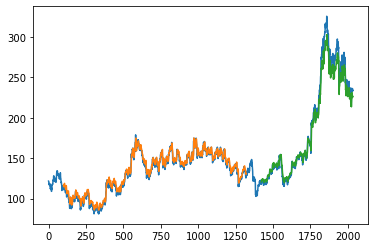

In [49]:
look_back=100
trainpredictplot = np.empty_like(data_close)
trainpredictplot[:, :] =np.nan
trainpredictplot[look_back:len(train_predict)+look_back, :] = train_predict

testpredictplot =np.empty_like(data_close)
testpredictplot[:, :] = np.nan
testpredictplot[len(train_predict)+(look_back*2)+ 1:len(data_close) -1 , :] = test_predict

plt.plot(scaler.inverse_transform(data_close))
plt.plot(trainpredictplot)
plt.plot(testpredictplot)

plt.show()